# Customer Segmentation on Wholesale data - Clustering

-----------------------------------------
## Objective
-----------------------------------------

To identify if there exist various cluster of customers that are more similar to each other in terms of annual spending across some wholesale products and get their segmentation insight in terms of the Channel and Region they belong.

## Importing libraries and overview of the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
#Outlier Handling Imports
from scipy.stats.mstats import winsorize

#Normalization & Scaler Imports
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.decomposition import PCA

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [2]:
#loading and reading data
data=pd.read_csv('Wholesale_customers_data.csv')

In [3]:
# number of rows and columns in data
data.shape

(440, 8)

In [4]:
#checking for missing values
data.isnull().any().sum()

0

#### Check the info of the data

In [5]:
#basic information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


**Observations:**
 
 - There are 440 observations and 8 columns in the data.
 - All columns have 440 non-null values i.e. there are no missing values.
 - All the columns are numerical, however,as provided in the data dictionary, the Channel and Region column are norminal 
 - Everything looks great, lets move ahead to check duplicates.

#### Check duplicate entries

In [6]:
# checkingfor duplicates in data
data.duplicated().sum()

0

- There are no duplicate rows in the data. That's good. 

### Changing the Channel and Region column from numerical type to string type  

In [7]:
data.Channel=data['Channel'].astype(str)
data.Region=data['Region'].astype(str)

In [8]:
channel_dic={'1':'Horeca','2':'Retail'}
region_dic={'1':'Lisbon','2':'Oporto','3':'Other Region'}

In [9]:
data['Channel']=data['Channel'].map(channel_dic)
data['Region']=data['Region'].map(region_dic)

In [10]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other Region,12669,9656,7561,214,2674,1338
1,Retail,Other Region,7057,9810,9568,1762,3293,1776
2,Retail,Other Region,6353,8808,7684,2405,3516,7844
3,Horeca,Other Region,13265,1196,4221,6404,507,1788
4,Retail,Other Region,22615,5410,7198,3915,1777,5185


## Exploratory Data Analysis

#### Summary Statistics

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


**Observations:**

- The average annual spending on Fresh is approximately 12,000 m.u. The Fresh column has maximum value range with a minimum annual spending of 3 m.u and a maximum annual spending of 112151
- The average annual spending on Milk is approximately 5796 m.u. The Milk column has high value range with a minimum annual spending of 55 m.u and a maximum annual spending of 73498.
- The average annual spending on Grocery is approximately 9503 m.u. The Grocery column has high value range with a minimum annual spending of 3 m.u and a maximum annual spending of 92780.
- The average annual spending on Frozen is approximately 3072 m.u. The Frozen column has high value range with a minimum annual spending of 25 m.u and a maximum annual spending of 60869.
- The average annual spending on Detergents_Paper is approximately 2881 m.u. The Detergents_Paper column has high value range with a minimum annual spending of 3 m.u and a maximum annual spending of 40827.
- The average annual spending on Delicassen is approximately 9503 m.u. The Delicassen column has high value range with a minimum annual spending of 3 m.u and a maximum annual spending of 47943.

- All the variables seem to have very high spread across spending. These are the variables that might help us identify the clusters, if they exist. 

In [12]:
data.describe(include='O').T

,count,unique,top,freq
Channel,440,2,Horeca,298
Region,440,3,Other Region,316


**Observations:**

- The Channel column has 2 unique values, with Horeca (Hotel,Rstaurant and Cafe) category having the maximum count of observation as 298.
- The Region column has 3 unique values, with Other Region category having the maximum count of observation as 316.

- All the categorical variables have an observation count of 440. 

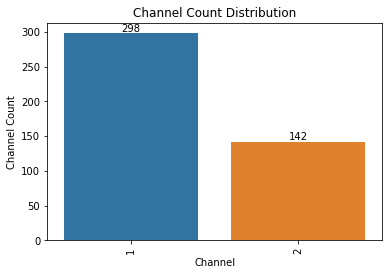

In [7]:
#plot of Channel Count Distribution
ax=sns.countplot(x=data['Channel'])
ax.bar_label(ax.containers[0])
plt.title('Channel Count Distribution')
plt.xlabel('Channel')
plt.ylabel('Channel Count')
plt.xticks(rotation = 90);
plt.show()

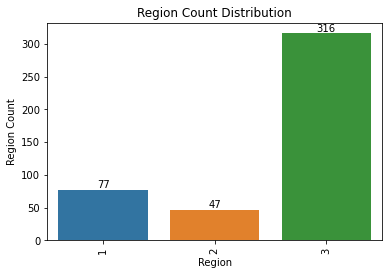

In [8]:
#plot of Region Count Distribution
ax=sns.countplot(x=data['Region'])
ax.bar_label(ax.containers[0])
plt.title('Region Count Distribution')
plt.xlabel('Region')
plt.ylabel('Region Count')
plt.xticks(rotation = 90);
plt.show()

#### Let's check the distribution and outliers for each numerical column in the data

Fresh
Distribution and Boxplot of Fresh


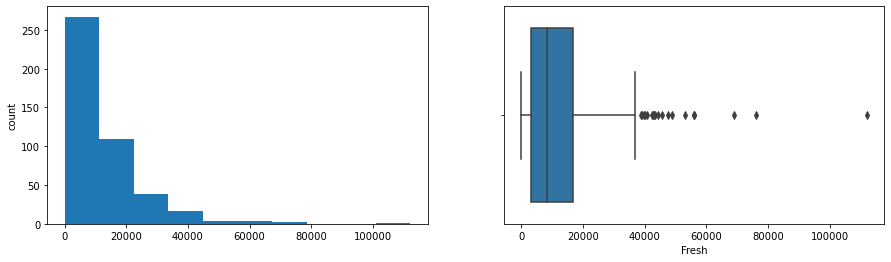

Milk
Distribution and Boxplot of Milk


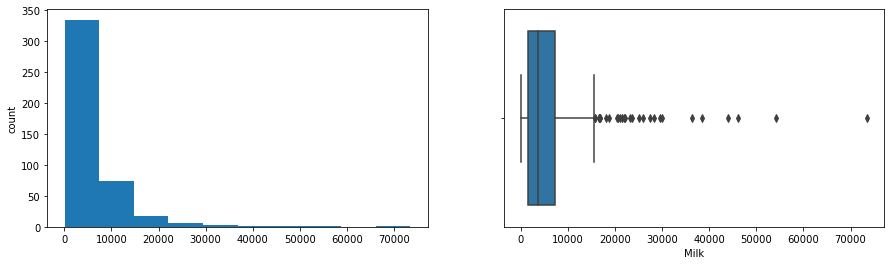

Grocery
Distribution and Boxplot of Grocery


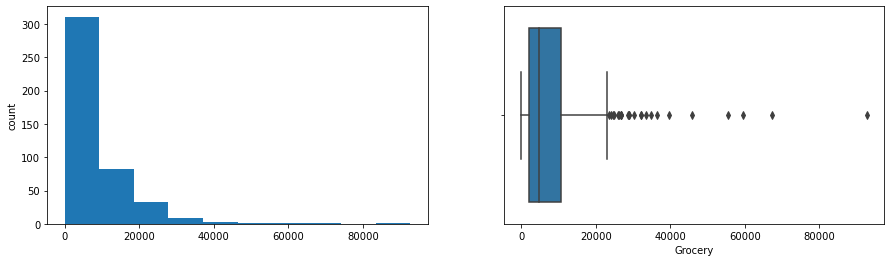

Frozen
Distribution and Boxplot of Frozen


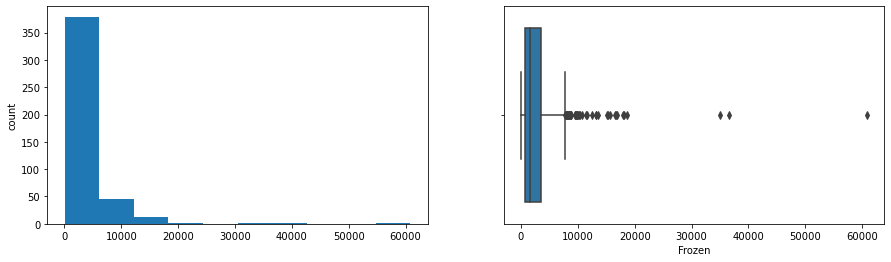

Detergents_Paper
Distribution and Boxplot of Detergents_Paper


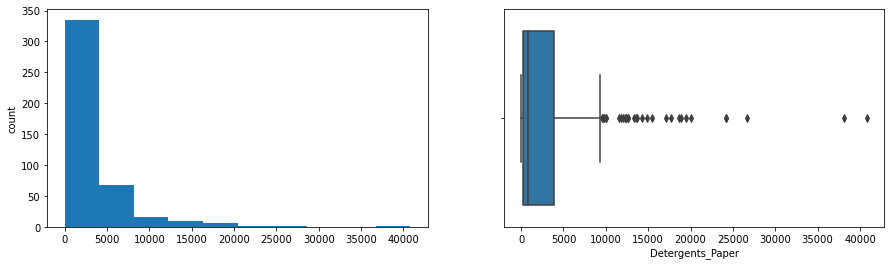

Delicassen
Distribution and Boxplot of Delicassen


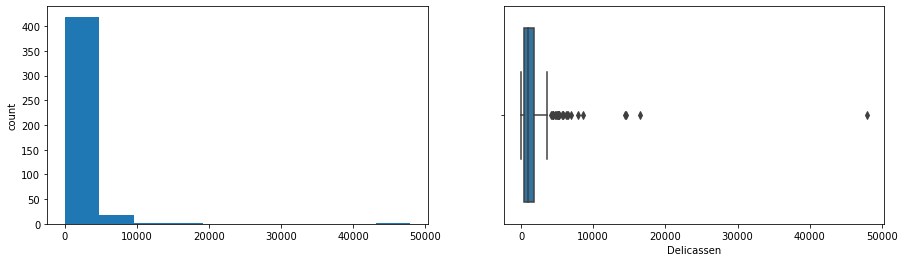

In [9]:
#plot of distribution and outliers of data
for col in data.columns[2:]:
    print(col)
    print('Distribution and Boxplot of', col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations:**

- The distribution for all the variables is highly skewed to the right. 
- All the variables have some outliers to the right end.

#### Outlier Analysis and Handling for each numerical column in the data

In [11]:
#Outlier detection, measure in percentage
num_col = data.columns.tolist()[2:]
#Function to detect the outliers using IQR
def outlier_count(col, data=data):
    #q75, q25 = np.percentile(data[col], [25, 75])
    # calculate the interquartile range(Q1,Q3)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    min_val = Q1 - (IQR*1.5)
    max_val = Q3 + (IQR*1.5)
    #Finding the length of data that is more than max threshold and lesser than min threshold
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('{:<20} {:<20} {:.4f}%'.format(col,outlier_count,outlier_percent,))
    
#Looping over all the numerical columns to outlier count function to find the total count of outliers in data.
print("\n"+20*'*' + ' Outliers ' + 20*'*'+"\n")
print('{:<20} {:<20} {:<20}'.format('Variable Name','Number Of Outlier','Outlier(%)'))
for col in num_col:
    outlier_count(col)


******************** Outliers ********************

Variable Name        Number Of Outlier    Outlier(%)          
Fresh                20                   4.5500%
Milk                 28                   6.3600%
Grocery              24                   5.4500%
Frozen               43                   9.7700%
Detergents_Paper     30                   6.8200%
Delicassen           27                   6.1400%


**Observations:**

- The column Fresh has the lowest outliers count. 
- The column Frozen has the highest outliers count.
- All columns have outliers count value ranging from from 20 to 43 in the data.

### Outlier Handling 

As shown in the box plot and above result, we have outliers in our dataset but, removing outlier will cause data loss. We can't afford data loss for such small dataset. Instead of removing let's apply winsorize to cap the outliers here.

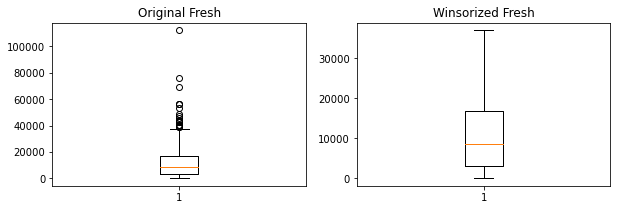

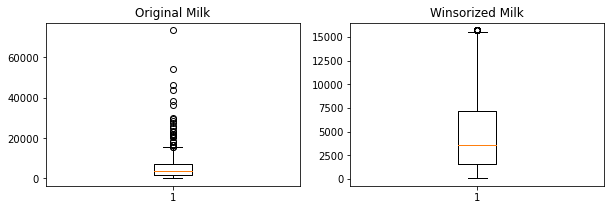

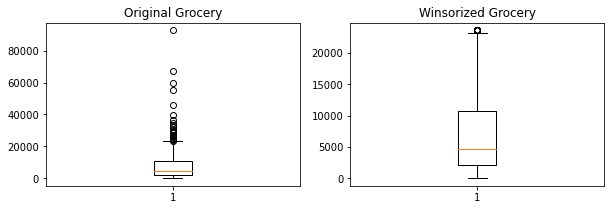

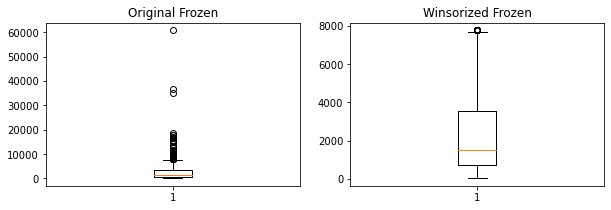

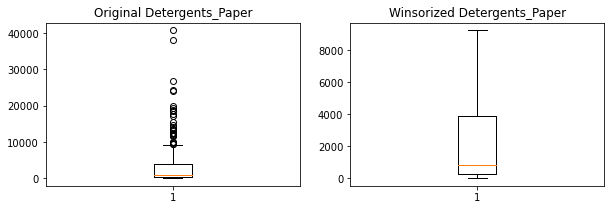

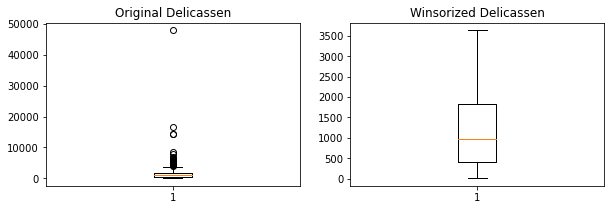

In [12]:
# applying winsorize technique to cap the outliers 
def winsor(col, lower_limit=0, upper_limit=0, show_plot=True):
    
    #Using scipy.stats.mstats.winsorize to each column
    winsor_data = winsorize(data[col], limits=(lower_limit, upper_limit))
    
    #Assigning the winsorized data from each column to  dict
    winsor_dict[col] = winsor_data
    
    #Using box plot, visializing the data to check the outliers before and after winsorizing
    if show_plot == True:
        plt.figure(figsize=(10,3))
        
        #draw plot with original dataset
        plt.subplot(121)
        plt.boxplot(data[col])
        plt.title('Original {}'.format(col))
        
        #draw plot with winsorized dataset
        plt.subplot(122)
        plt.boxplot(winsor_data)
        
        #assigning titile to the plot
        plt.title('Winsorized {}'.format(col))
        plt.show()


#Creating an empty dict to load all the winsorised data
winsor_dict = {}

#In boxplot  ['Fresh'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[0], upper_limit = 0.0455, show_plot=True)

#In boxplot  ['Milk'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[1], upper_limit = 0.0636, show_plot=True)

#In boxplot  ['grocery'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[2], upper_limit = 0.0545, show_plot=True)

#In boxplot  ['Frozen'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[3], upper_limit = 0.0977, show_plot=True)

#In boxplot  ['Detergents_Paper'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[4], upper_limit = 0.0682, show_plot=True)

#In boxplot  ['Delicassen'], It is seen that the outliers are in the upper boundanday of the plot,
winsor(num_col[5], upper_limit = 0.0614, show_plot=True)

**Let's check the correlation among the variables**

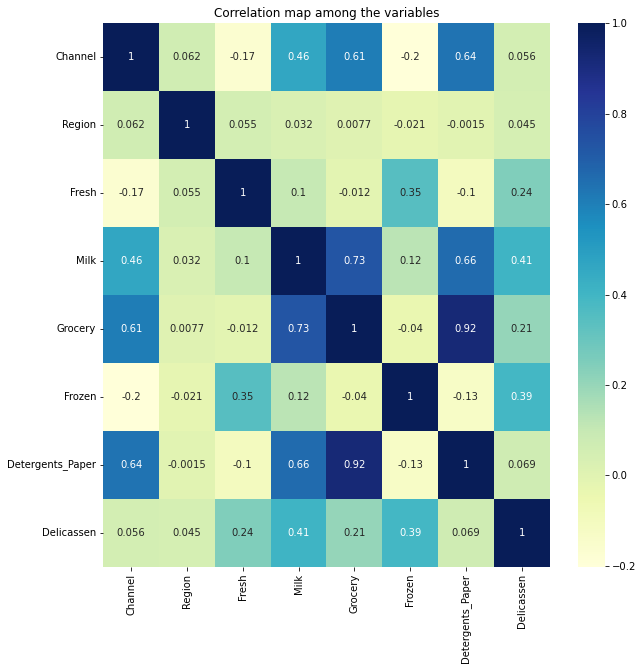

In [13]:
# Correlation plot
plt.figure(figsize  = (10,10))
plt.title('Correlation map among the variables')
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:**

- There is a strong positive correlation between Grocery and Detergents_Paper. This makes sense. 
- Milk is positively correlated with Grocery and Detergents_Paper. 
- Detergents_Paper strongly negative correlated with Fresh and Frozen. 


## Feature Scaling: Normalization of the data

- Clustering algorithms are distance based algorithms and all distance based algorithms are affected by the scale of the variables. Therefore, we will scale the data before applying clustering algorithms.
- We will drop the variables `"Channel" and "Region"` before scaling the data as we would not use these two variables for clustering the customers.

In [14]:
df = data.drop(columns=["Channel", "Region"])

In [15]:
# Normalize the data and visulize it.
norm_data=normalize(df)
df_norm=pd.DataFrame(norm_data,columns=df.columns)
df_norm.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [16]:
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,0.608111,0.339614,0.000175,0.285100,0.722229,0.927366,0.999391
Milk,440.0,0.306342,0.216936,0.005848,0.123490,0.251437,0.455574,0.926102
Grocery,440.0,0.414267,0.267369,0.000143,0.164689,0.375277,0.654840,0.976789
Frozen,440.0,0.185777,0.200710,0.000644,0.045811,0.112828,0.243927,0.944218
Detergents_Paper,440.0,0.137032,0.149245,0.000143,0.020551,0.062453,0.242912,0.903593
Delicassen,440.0,0.087564,0.089597,0.000077,0.030020,0.062284,0.117928,0.642610


Fresh
Distribution and Boxplot of Fresh


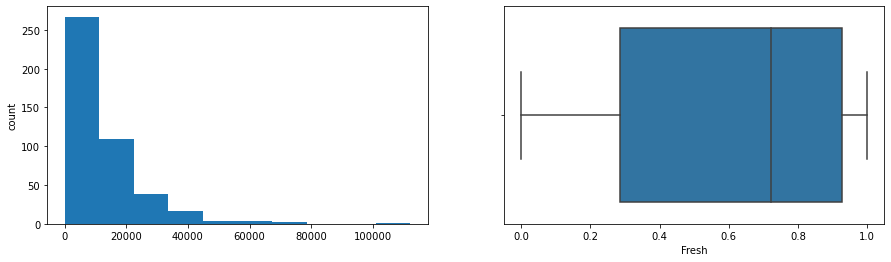

Milk
Distribution and Boxplot of Milk


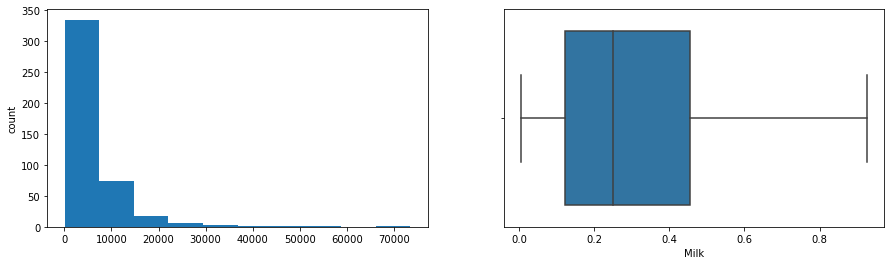

Grocery
Distribution and Boxplot of Grocery


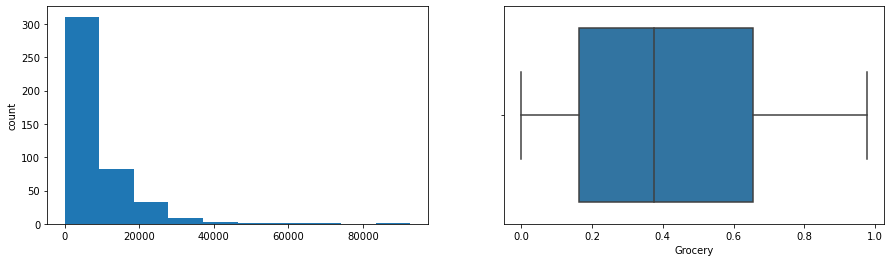

Frozen
Distribution and Boxplot of Frozen


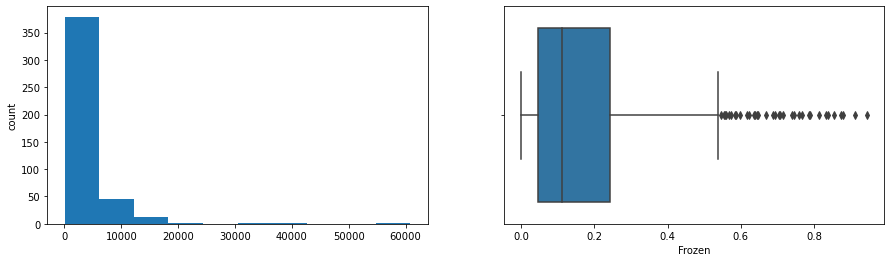

Detergents_Paper
Distribution and Boxplot of Detergents_Paper


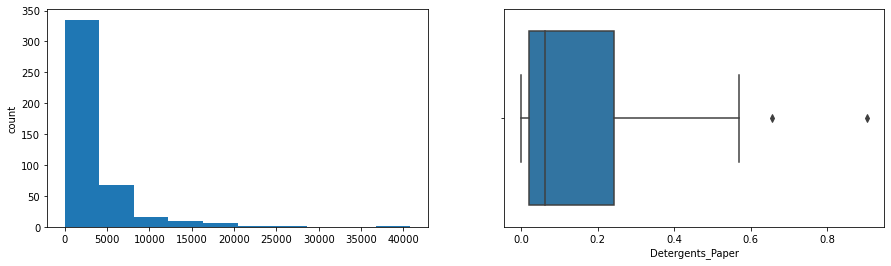

Delicassen
Distribution and Boxplot of Delicassen


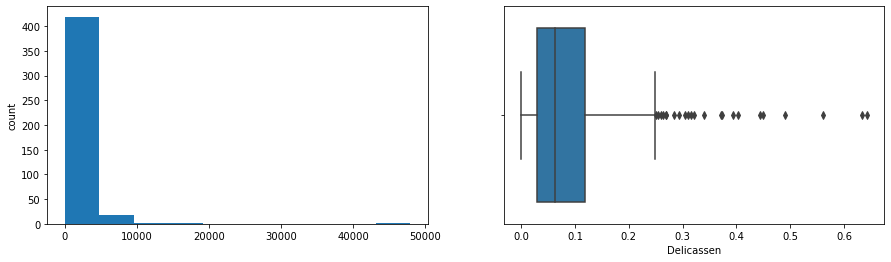

In [17]:
# Distribution and Boxplot of normalized data
for col in df_norm.columns[:]:
    print(col)
    print('Distribution and Boxplot of', col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_norm[col])
    plt.show()

## Principal Component Analysis

- PCA helps us by creating natural clusters where combinations frequently co-occur and in reducing the dimensions also enables us to visualize our dataset in a way that's otherwise not possible.

In [18]:
#Finding principal components for the data
pca = PCA(n_components=2, random_state=1)
data_pca_1 = pd.DataFrame(pca.fit_transform(df_norm))
data_pca_1

,0,1
0,0.034037,-0.180421
1,0.351057,-0.046644
2,0.305375,0.055551
3,-0.383677,0.161789
4,-0.318591,-0.076970
...,...,...
435,-0.166266,0.106042
436,-0.607490,-0.097158
437,0.464837,-0.191884
438,-0.412001,-0.120676


In [19]:
#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

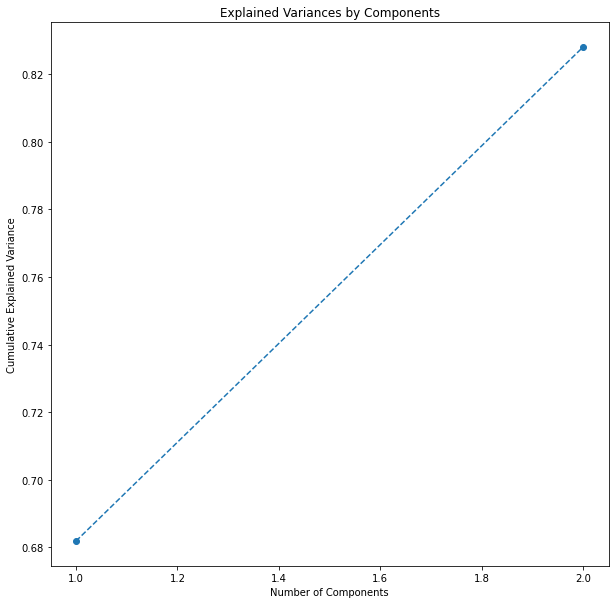

In [20]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,3), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [21]:
# find the least number of components that can explain more than 80% variance
sum = 0
for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.80):
        print("Number of PCs that explain at least 80% variance: ", ix+1)
        break

Number of PCs that explain at least 80% variance:  2


**Observations**:
-  We can see that out of the 6 original features, we reduced the number of features through principal components to 2, these components explain more than 80% of the original variance.
- So that is about 33% reduction in the dimensionality with a loss of 20% in variance.
- Let us now look at these principal components as a linear combination of original features.

In [22]:
#coefficiets of features across the two components
pc_comps = ['PC1','PC2']
data_pca_coe = pd.DataFrame(np.round(pca.components_[:2,:],2),index=pc_comps,columns=df_norm.columns)
data_pca_coe

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PC1,-0.72,0.34,0.54,-0.11,0.25,0.02
PC2,-0.33,0.06,-0.22,0.90,-0.17,0.08


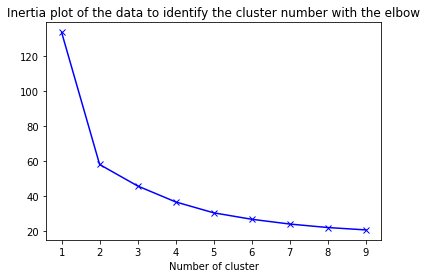

In [23]:
#Empty dictionary to store the SSE for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_norm)
    sse[k] = kmeans.inertia_ 

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.title("Inertia plot of the data to identify the cluster number with the elbow")
plt.show()

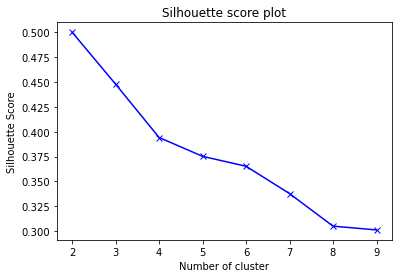

In [24]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df_norm)
    labels = kmeans.predict(df_norm)
    sc[k] = silhouette_score(df_norm, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title('Silhouette score plot')
plt.show()

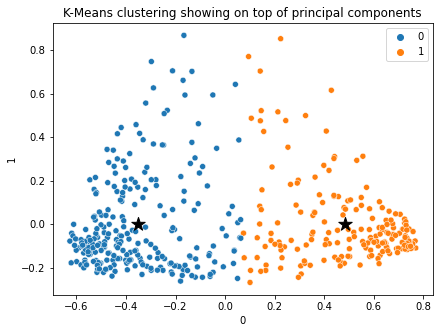

In [25]:
#scatter plot to see the segmentation
#Cluster=2
kmeans = KMeans(n_clusters=2, random_state=1).fit(data_pca_1)
y_kmeans = kmeans.predict(data_pca_1)
#df = df.assign(segment = kmeans.labels_)
data['kmeans_labels']=kmeans.predict(data_pca_1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
sns.scatterplot(x=data_pca_1[0], y=data_pca_1[1],hue = y_kmeans,data=data_pca_1,legend=True)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], marker = '*', color='black', s=200)
plt.title('K-Means clustering showing on top of principal components')
plt.show()

In [26]:
data.kmeans_labels.value_counts()

0    255
1    185
Name: kmeans_labels, dtype: int64

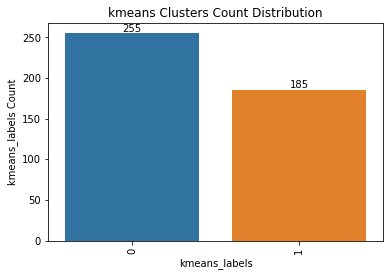

In [27]:
ax=sns.countplot(x=data['kmeans_labels'])
ax.bar_label(ax.containers[0])
plt.title('kmeans Clusters Count Distribution')
plt.xlabel('kmeans_labels')
plt.ylabel('kmeans_labels Count')
plt.xticks(rotation = 90);
plt.show()

In [28]:
#Calculating mean and median of the original data for each label
mean = data.groupby(y_kmeans).mean()
median = data.groupby(y_kmeans).median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean','group_0 Median', 'group_1 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_0 Median,group_1 Median
Channel,1.125490,1.594595,1.0,2.0
Region,2.545098,2.540541,3.0,3.0
Fresh,17319.117647,4668.951351,13779.0,2790.0
Milk,3298.588235,9239.010811,2102.0,7027.0
Grocery,3973.615686,13434.000000,2743.0,10704.0
Frozen,4002.843137,1788.783784,2276.0,950.0
Detergents_Paper,828.819608,5710.854054,397.0,4314.0
Delicassen,1494.360784,1566.924324,838.0,1111.0
kmeans_labels,0.000000,1.000000,0.0,1.0


## Gaussian Mixture Clustering

In [29]:
gmm = GaussianMixture(n_components = 2, random_state = 1)
gmm.fit(data_pca_1)
data['GmmLabels'] = gmm.predict(data_pca_1)
y_gmm=gmm.predict(data_pca_1)

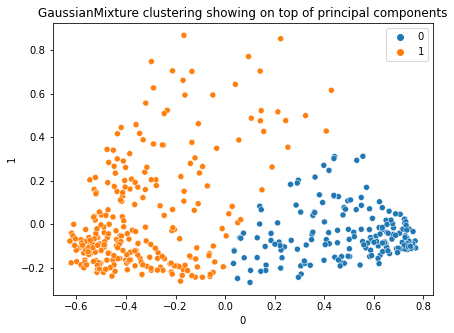

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,2)
sns.scatterplot(x=data_pca_1[0], y=data_pca_1[1],hue = y_gmm,data=data_pca_1,legend=True)
plt.title('GaussianMixture clustering showing on top of principal components')
plt.show()


In [31]:
data.GmmLabels.value_counts()

1    264
0    176
Name: GmmLabels, dtype: int64

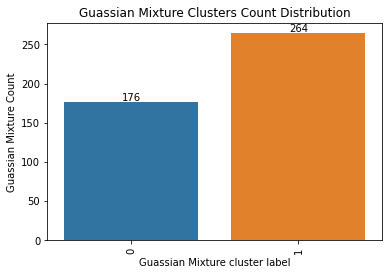

In [32]:
ax=sns.countplot(x=data['GmmLabels'])
ax.bar_label(ax.containers[0])
plt.title('Guassian Mixture Clusters Count Distribution')
plt.xlabel('Guassian Mixture cluster label')
plt.ylabel('Guassian Mixture Count')
plt.xticks(rotation = 90);
plt.show()

In [33]:
#Calculating mean and median of the original data for each label
original_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean','group_0 Median', 'group_1 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_0 Median,group_1 Median
Fresh,4950.318182,16700.284091,3054.5,13312.5
Milk,9485.000000,3337.109848,7503.5,2101.0
Grocery,13974.431818,3935.840909,11032.0,2725.0
Frozen,1394.846591,4189.988636,904.5,2359.0
Detergents_Paper,6011.375000,794.905303,4526.5,396.0
Delicassen,1546.142045,1510.689394,1106.5,864.0


- There is a strong positive correlation between Grocery and Detergents_Paper. This makes sense. 
- Milk is positively correlated with Grocery and Detergents_Paper. 
- Detergents_Paper strongly negative correlated with Fresh and Frozen. 


In [34]:
def get_spending_insight(df):
    df1=df.copy()
    cols=df1.columns.tolist()[:]
    for col in cols:
        for i in range(2):
            if df1[col][i] > data[col].mean():
                df1[col][i]='High'
            elif df1[col][i] < data[col].mean():
                df1[col][i]='Low'
            else:
                df1[col][i]='Equal'
    return df1

In [35]:
km_a=data.set_index('kmeans_labels')

In [36]:
km_col_avg=km_a.groupby('kmeans_labels').mean().drop('GmmLabels',axis=1)

In [37]:
km_col_avg

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
kmeans_labels,,,,,,,,
0,1.125490,2.545098,17319.117647,3298.588235,3973.615686,4002.843137,828.819608,1494.360784
1,1.594595,2.540541,4668.951351,9239.010811,13434.000000,1788.783784,5710.854054,1566.924324


In [38]:
gm_a=data.set_index('GmmLabels')

In [39]:
gmm_col_avg=gm_a.groupby('GmmLabels').mean().drop('kmeans_labels',axis=1)

In [40]:
gmm_col_avg

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
GmmLabels,,,,,,,,
0,1.636364,2.551136,4950.318182,9485.000000,13974.431818,1394.846591,6011.375000,1546.142045
1,1.113636,2.537879,16700.284091,3337.109848,3935.840909,4189.988636,794.905303,1510.689394


In [41]:
kmean_cluster_spending_insight= get_spending_insight(km_col_avg)

In [42]:
kmean_cluster_spending_insight

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
kmeans_labels,,,,,,,,
0,Low,High,High,Low,Low,High,Low,Low
1,High,Low,Low,High,High,Low,High,High


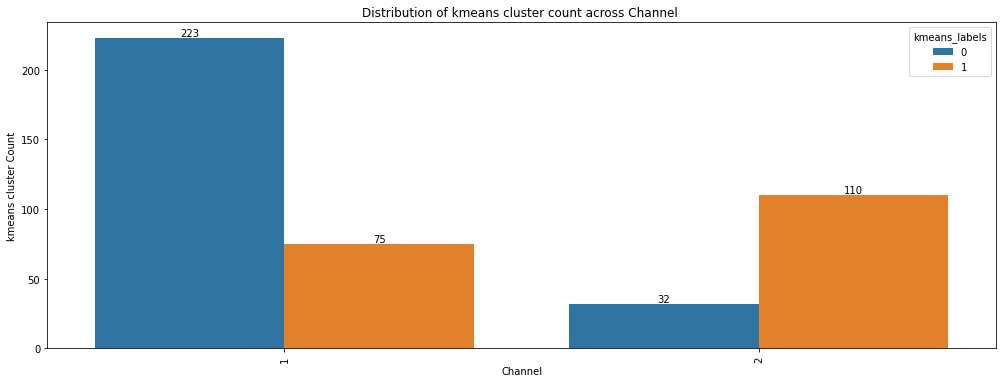

In [43]:
fig= plt.figure(figsize = (17, 6))
ax=sns.countplot(x=data['Channel'],hue=data['kmeans_labels']) 
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Distribution of kmeans cluster count across Channel ')
plt.xlabel('Channel')
plt.ylabel('kmeans cluster Count')
plt.xticks(rotation = 90);

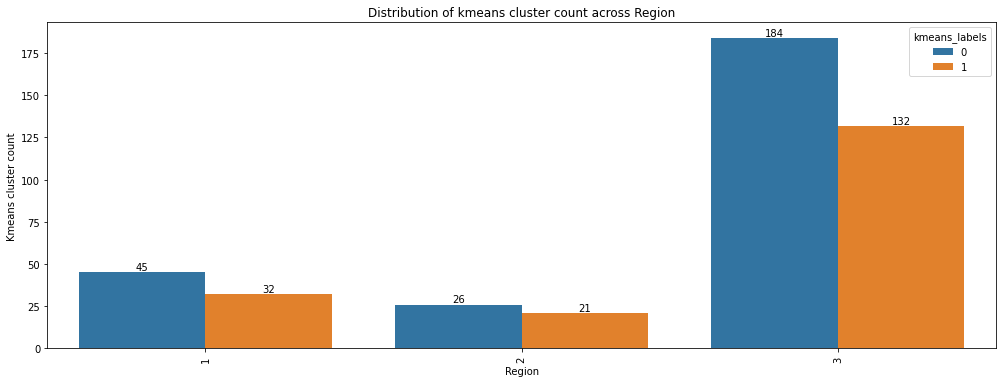

In [44]:
fig= plt.figure(figsize = (17, 6))
ax=sns.countplot(x=data['Region'],hue=data['kmeans_labels']) 
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Distribution of kmeans cluster count across Region')
plt.xlabel('Region')
plt.ylabel('Kmeans cluster count')
plt.xticks(rotation = 90);

In [45]:
gmm_cluster_spending_insight= get_spending_insight(gmm_col_avg)

In [46]:
gmm_cluster_spending_insight

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
GmmLabels,,,,,,,,
0,High,High,Low,High,High,Low,High,High
1,Low,Low,High,Low,Low,High,Low,Low


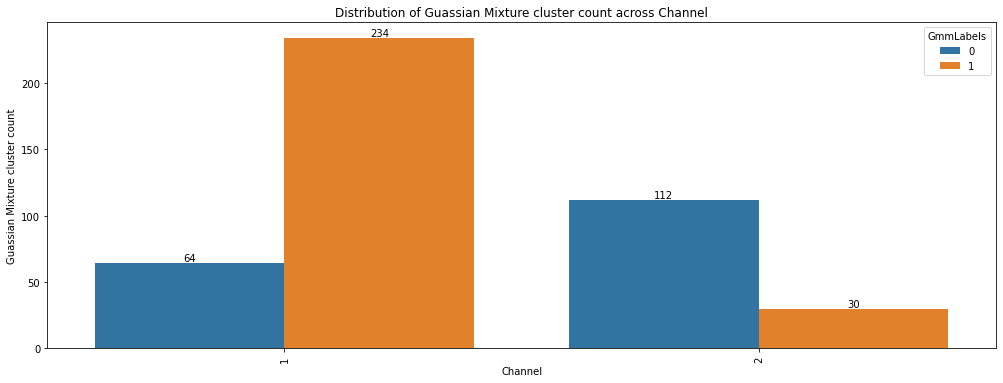

In [47]:
fig= plt.figure(figsize = (17, 6))
ax=sns.countplot(x=data['Channel'],hue=data['GmmLabels']) 
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Distribution of Guassian Mixture cluster count across Channel')
plt.xlabel('Channel')
plt.ylabel('Guassian Mixture cluster count')
plt.xticks(rotation = 90);

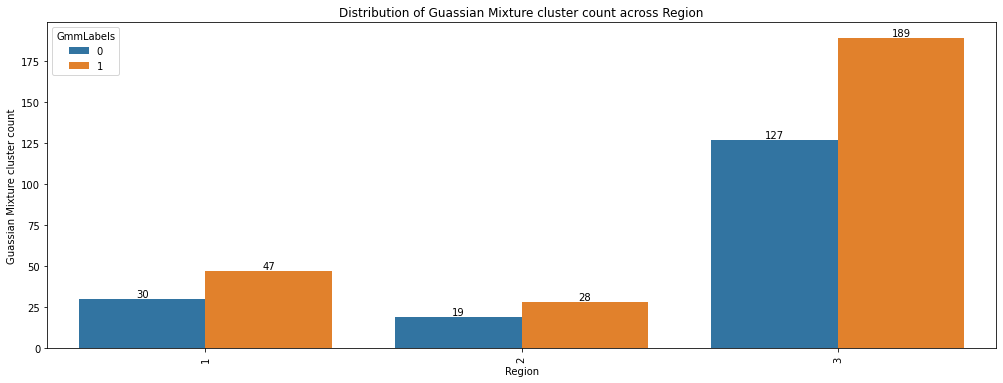

In [48]:
fig= plt.figure(figsize = (17, 6))
ax=sns.countplot(x=data['Region'],hue=data['GmmLabels']) 
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Distribution of Guassian Mixture cluster count across Region')
plt.xlabel('Region')
plt.ylabel('Guassian Mixture cluster count')
plt.xticks(rotation = 90);